In [344]:
#importing libraries

In [345]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [346]:
#Initial data check

In [347]:
df_lead = pd.read_csv('Leads.csv')

In [348]:
#checking data frame

In [349]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [350]:
#Checking data info

In [351]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [352]:
#checking dataframe shape

In [353]:
df_lead.shape

(9240, 37)

In [354]:
#Checking dataframe other stats

In [355]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [356]:
#Checking for duplicay in data

In [357]:
sum(df_lead.duplicated('Prospect ID'))

0

In [358]:
sum(df_lead.duplicated('Lead Number'))

0

In [359]:
#Replacing all select values as nan

In [360]:
df_lead= df_lead.replace('Select', np.nan)

In [361]:
#checking unique values

In [362]:
df_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [363]:
#Analysing columns and dropping if not relevent

In [364]:
#dropping unique id colomns

In [365]:
df_lead.drop(['Prospect ID', 'Lead Number'],axis=1, inplace=True)

In [366]:
#Dropping columns having null values more than 35%

In [367]:
((df_lead.isnull().sum())/len(df_lead.index))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [368]:
df_lead.drop(['Specialization', 'How did you hear about X Education','Tags', 'Lead Quality','Lead Profile','City', 
                        'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1, inplace=True)

In [369]:
#Checking the columns again

In [370]:
((df_lead.isnull().sum())/len(df_lead.index))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

# Missing value treatment

In [371]:
((df_lead.Country.value_counts())/df_lead.Country.value_counts().sum())*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [372]:
#Dropping coulumn country Since it is high value towards a perticular country India  which is higly imbalance

In [373]:
df_lead.drop(['Country'],axis=1, inplace=True)

In [374]:
((df_lead['What is your current occupation'].value_counts(dropna=False))/df_lead['What is your current occupation'].value_counts(dropna=False).sum())*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [375]:
#replacing nan with other occupation value

In [376]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Other')

In [377]:
((df_lead['What matters most to you in choosing a course'].value_counts(dropna=False))/df_lead['What matters most to you in choosing a course'].value_counts(dropna=False).sum())*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [378]:
#Better Career Prospects and nan both consist of around 99% which is higly imbalance hence dropping this column

In [379]:
df_lead.drop(['What matters most to you in choosing a course'],axis=1, inplace=True)

In [380]:
#Checking the missing values again

In [381]:
((df_lead.isnull().sum())/len(df_lead.index))*100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.

In [382]:
((df_lead['Lead Source'].value_counts(dropna=False))/df_lead['Lead Source'].value_counts(dropna=False).sum())*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [383]:
#replacing nan with Google

In [384]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan,'Google')

In [385]:
((df_lead['TotalVisits'].value_counts(dropna=False))/df_lead['TotalVisits'].value_counts(dropna=False).sum())*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: TotalVisits, dtype: float64

In [386]:
np.mean(df_lead['TotalVisits'])

3.445237833681204

In [387]:
#replacing nan values with mean value 3

In [388]:
df_lead['TotalVisits'] = df_lead['TotalVisits'].replace(np.nan,'3')

In [389]:
((df_lead['Page Views Per Visit'].value_counts(dropna=False))/df_lead['Page Views Per Visit'].value_counts(dropna=False).sum())*100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64

In [390]:
np.mean(df_lead['Page Views Per Visit'])

2.3628199494672093

In [391]:
#replacing nan values with mean value 2

In [392]:
df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].replace(np.nan,'2')

In [393]:
((df_lead['Last Activity'].value_counts(dropna=False))/df_lead['Last Activity'].value_counts(dropna=False).sum())*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [394]:
#Replacing nan values with Email Opened

In [395]:
df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan,'Email Opened')

In [396]:
#finally checking for any nan values left in dataset

In [397]:
((df_lead.isnull().sum())/len(df_lead.index))*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

In [398]:
df_lead.dtypes

Lead Origin                                 object
Lead Source                                 object
Do Not Email                                object
Do Not Call                                 object
Converted                                    int64
TotalVisits                                 object
Total Time Spent on Website                  int64
Page Views Per Visit                        object
Last Activity                               object
What is your current occupation             object
Search                                      object
Magazine                                    object
Newspaper Article                           object
X Education Forums                          object
Newspaper                                   object
Digital Advertisement                       object
Through Recommendations                     object
Receive More Updates About Our Courses      object
Update me on Supply Chain Content           object
Get updates on DM Content      

In [399]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified


In [400]:
#converting numerical values to respective dtype

In [401]:
df_lead['TotalVisits'] = df_lead['TotalVisits'].astype(float)

In [402]:
df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].astype(float)

In [403]:
#creating list of numerical and categorical column list

In [404]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [405]:
df_num = ['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

In [406]:
df_cat = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity','What is your current occupation',
          'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']


In [407]:
target = ['Converted']

# EDA

In [408]:
#Univeriate Analysis

Converted


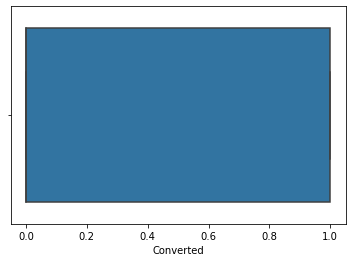

TotalVisits


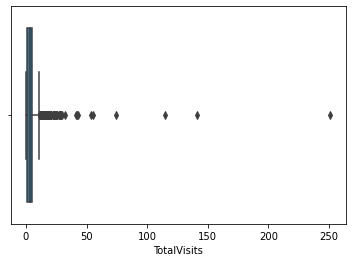

Total Time Spent on Website


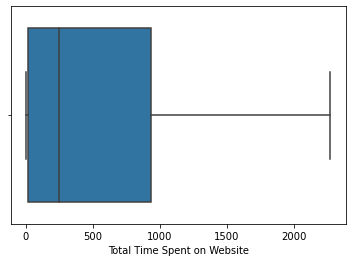

Page Views Per Visit


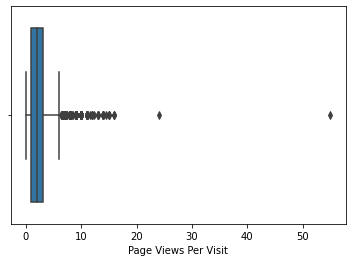

In [409]:
for i in df_num:
    print(i)
    sns.boxplot(df_lead[i])
    plt.show()

Converted


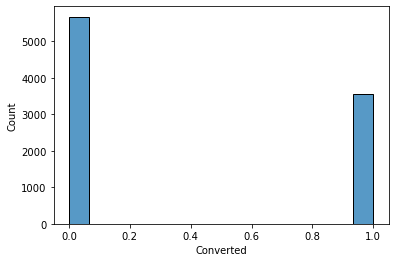

TotalVisits


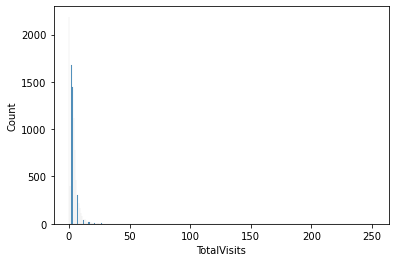

Total Time Spent on Website


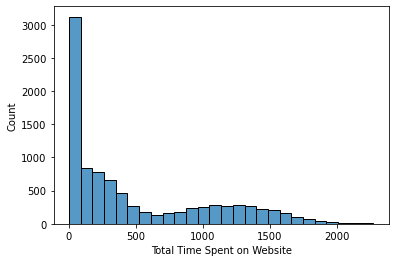

Page Views Per Visit


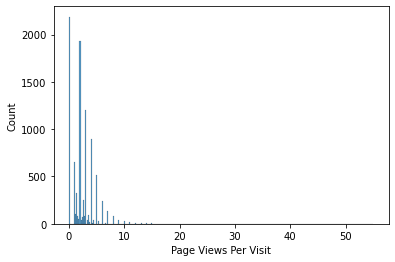

In [410]:
for i in df_num:
    print(i)
    sns.histplot(df_lead[i])
    plt.show()

Lead Origin


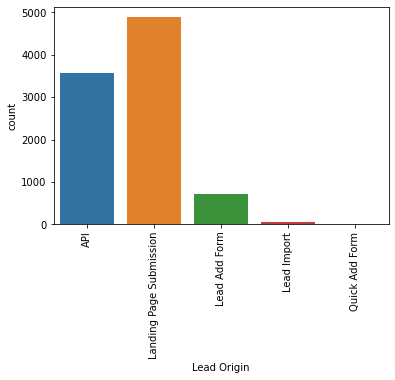

Lead Source


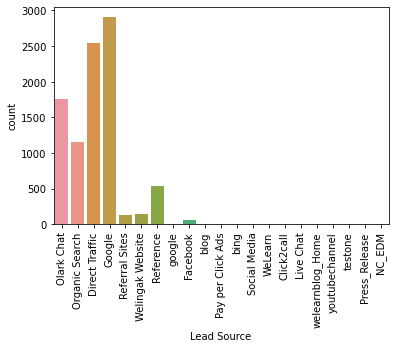

Do Not Email


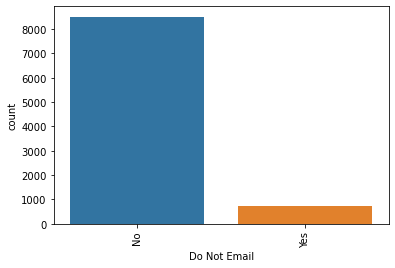

Do Not Call


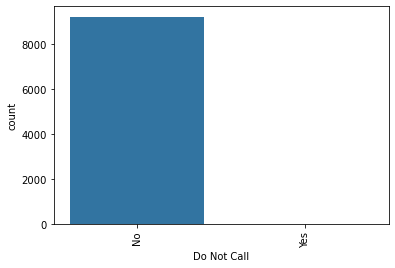

Last Activity


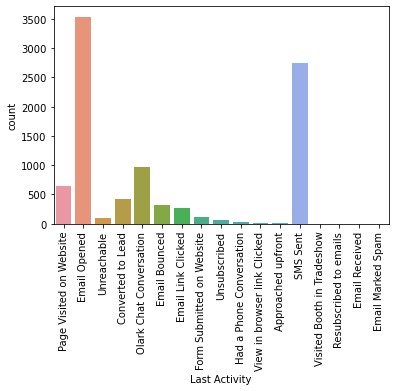

What is your current occupation


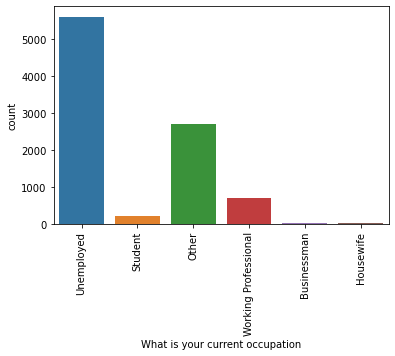

Search


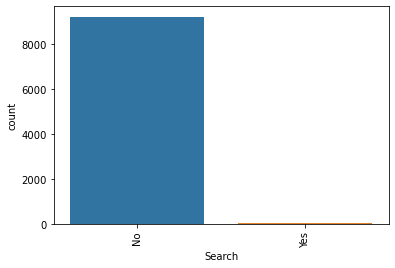

Magazine


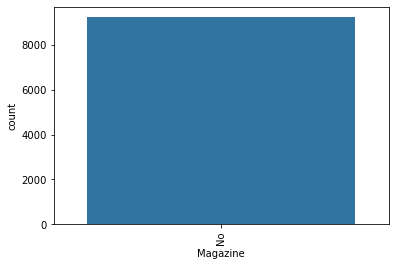

Newspaper Article


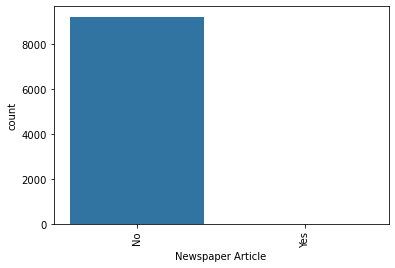

X Education Forums


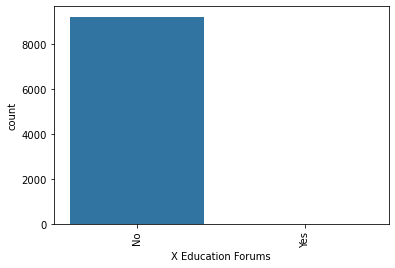

Newspaper


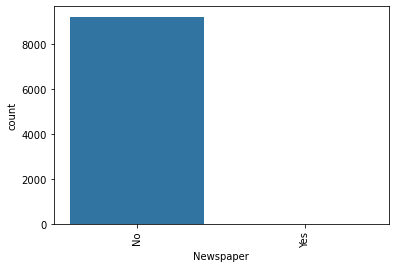

Digital Advertisement


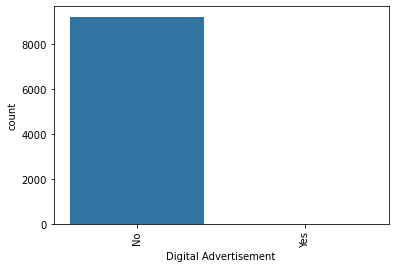

Through Recommendations


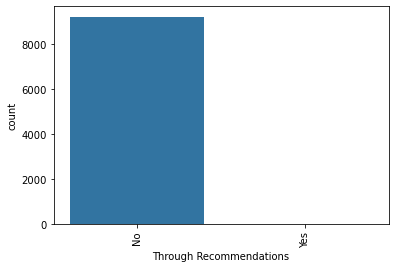

Receive More Updates About Our Courses


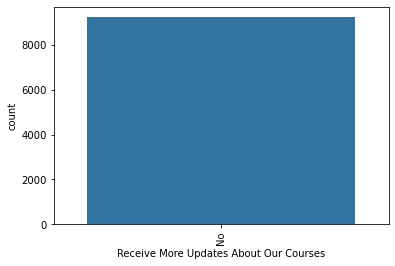

Update me on Supply Chain Content


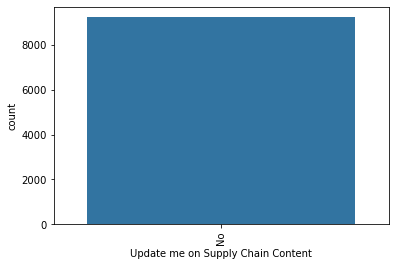

Get updates on DM Content


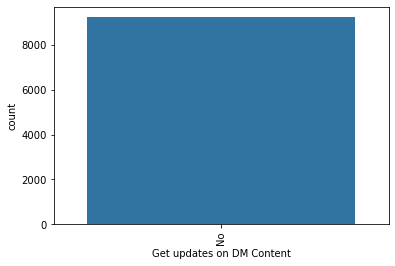

I agree to pay the amount through cheque


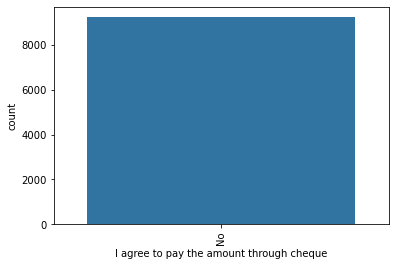

A free copy of Mastering The Interview


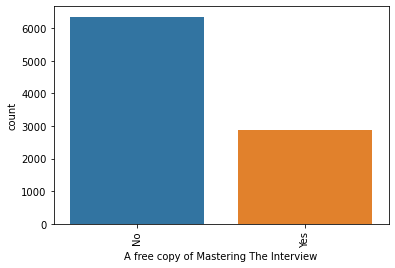

Last Notable Activity


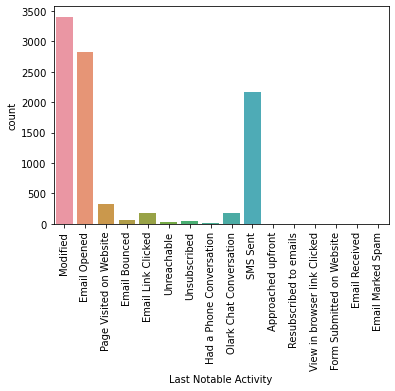

In [411]:
for i in df_cat:
    print(i)
    sns.countplot(df_lead[i]).tick_params(axis='x', rotation = 90)
    plt.show()

# Bivariate Analysis

Boxplot Converted Vs Lead Origin


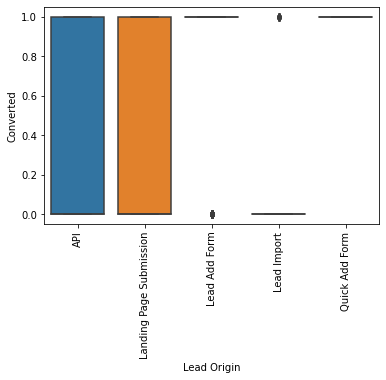

Boxplot Converted Vs Lead Source


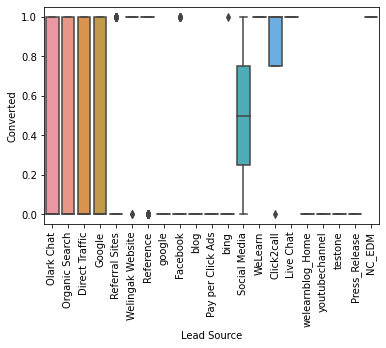

Boxplot Converted Vs Do Not Email


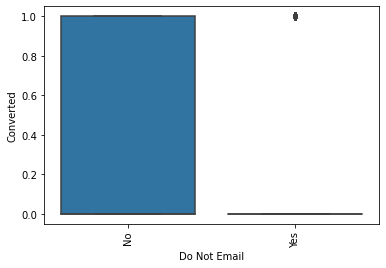

Boxplot Converted Vs Do Not Call


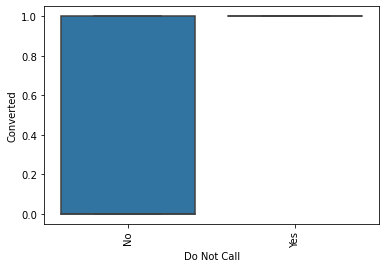

Boxplot Converted Vs Last Activity


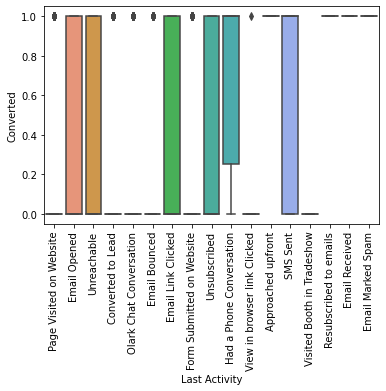

Boxplot Converted Vs What is your current occupation


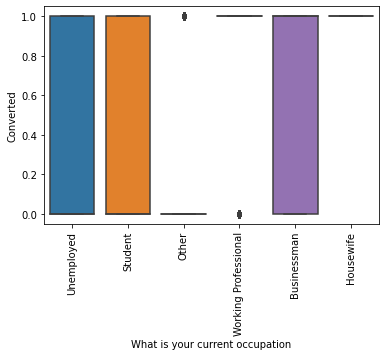

Boxplot Converted Vs Search


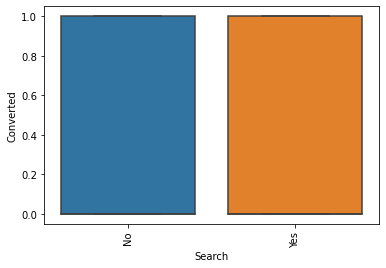

Boxplot Converted Vs Magazine


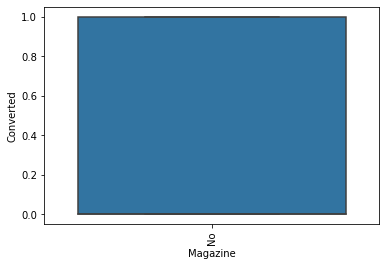

Boxplot Converted Vs Newspaper Article


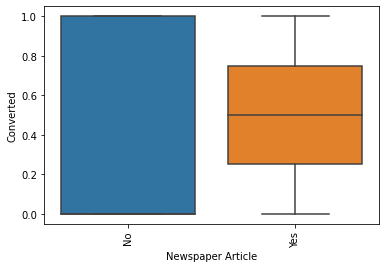

Boxplot Converted Vs X Education Forums


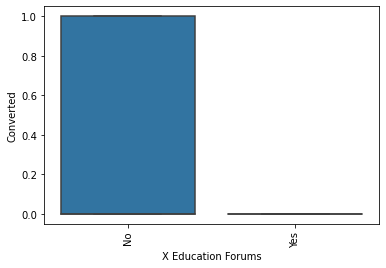

Boxplot Converted Vs Newspaper


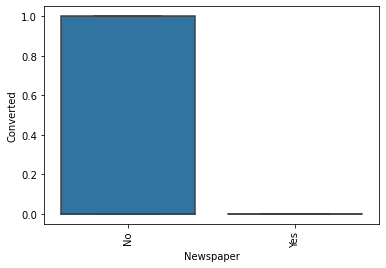

Boxplot Converted Vs Digital Advertisement


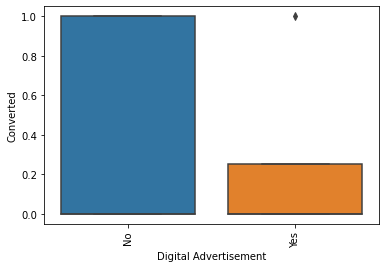

Boxplot Converted Vs Through Recommendations


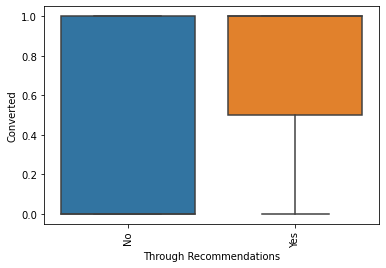

Boxplot Converted Vs Receive More Updates About Our Courses


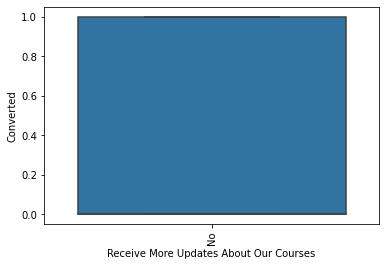

Boxplot Converted Vs Update me on Supply Chain Content


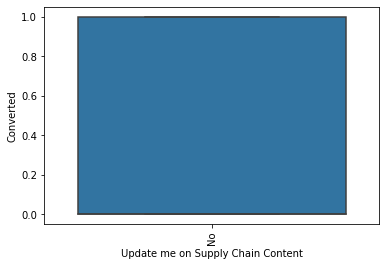

Boxplot Converted Vs Get updates on DM Content


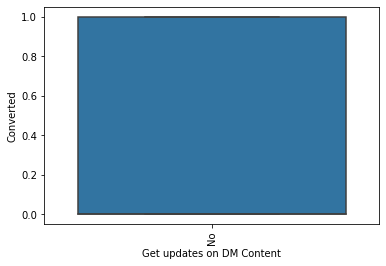

Boxplot Converted Vs I agree to pay the amount through cheque


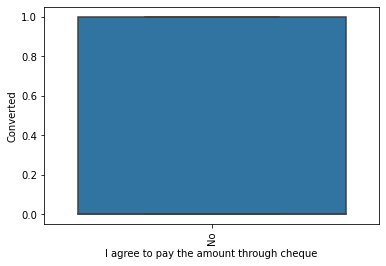

Boxplot Converted Vs A free copy of Mastering The Interview


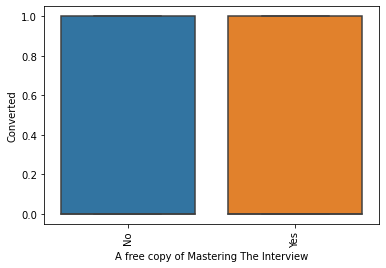

Boxplot Converted Vs Last Notable Activity


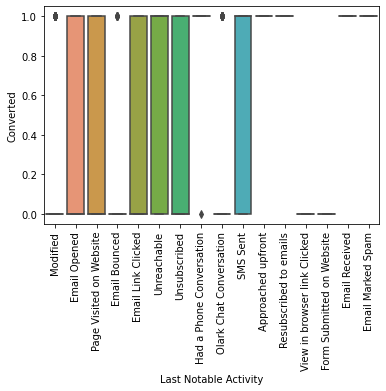

Boxplot TotalVisits Vs Lead Origin


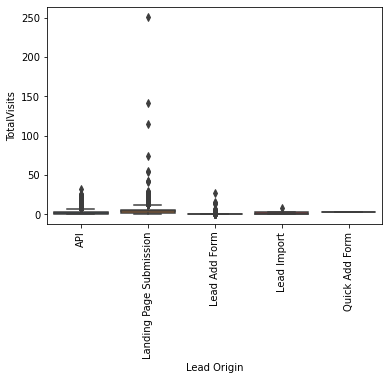

Boxplot TotalVisits Vs Lead Source


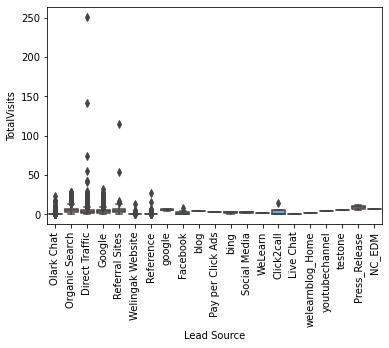

Boxplot TotalVisits Vs Do Not Email


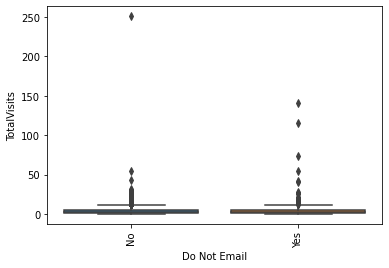

Boxplot TotalVisits Vs Do Not Call


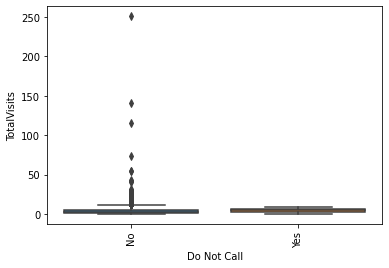

Boxplot TotalVisits Vs Last Activity


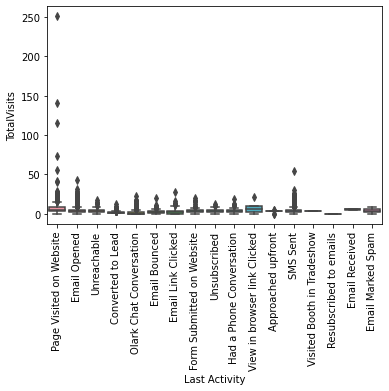

Boxplot TotalVisits Vs What is your current occupation


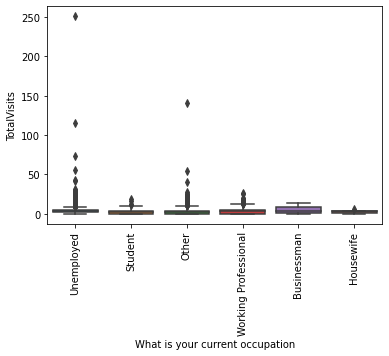

Boxplot TotalVisits Vs Search


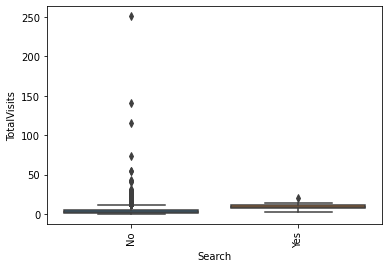

Boxplot TotalVisits Vs Magazine


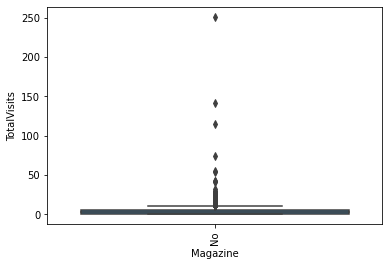

Boxplot TotalVisits Vs Newspaper Article


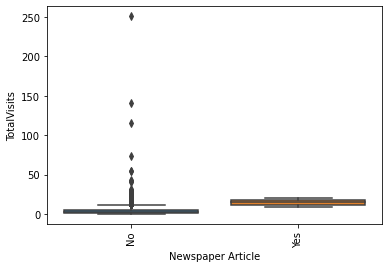

Boxplot TotalVisits Vs X Education Forums


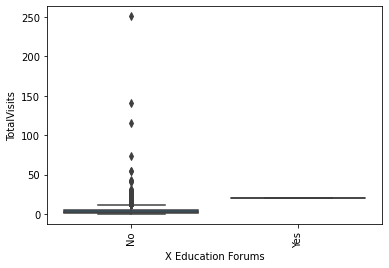

Boxplot TotalVisits Vs Newspaper


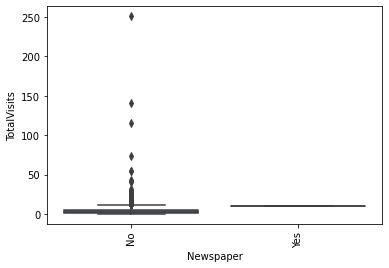

Boxplot TotalVisits Vs Digital Advertisement


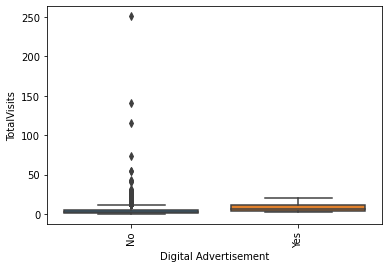

Boxplot TotalVisits Vs Through Recommendations


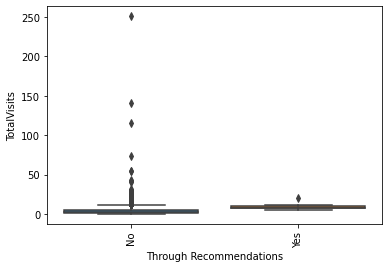

Boxplot TotalVisits Vs Receive More Updates About Our Courses


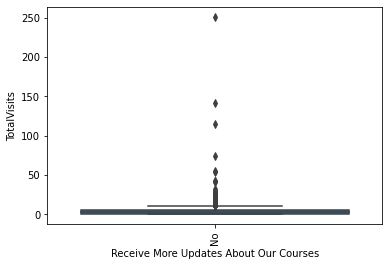

Boxplot TotalVisits Vs Update me on Supply Chain Content


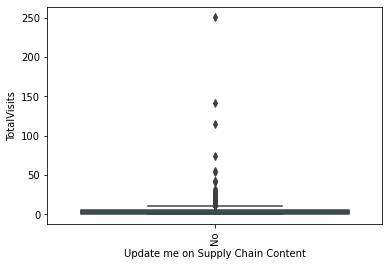

Boxplot TotalVisits Vs Get updates on DM Content


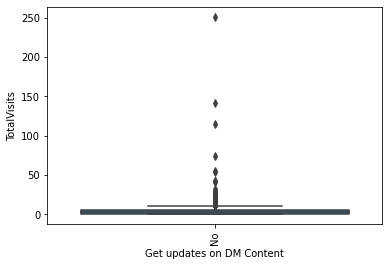

Boxplot TotalVisits Vs I agree to pay the amount through cheque


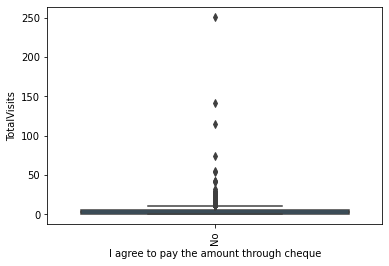

Boxplot TotalVisits Vs A free copy of Mastering The Interview


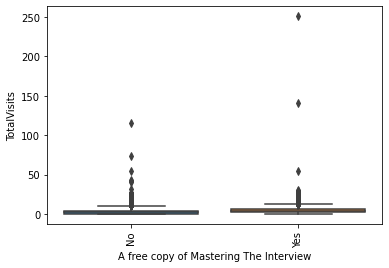

Boxplot TotalVisits Vs Last Notable Activity


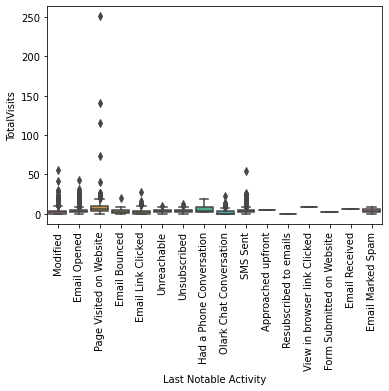

Boxplot Total Time Spent on Website Vs Lead Origin


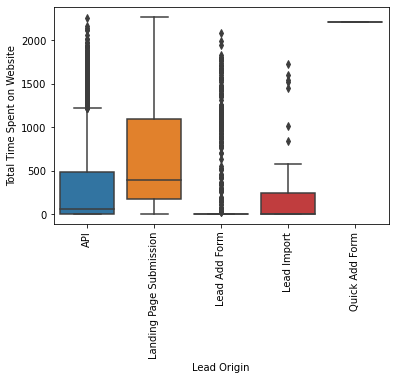

Boxplot Total Time Spent on Website Vs Lead Source


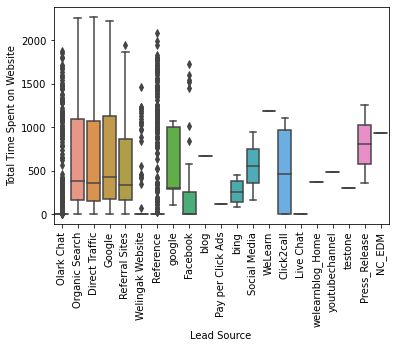

Boxplot Total Time Spent on Website Vs Do Not Email


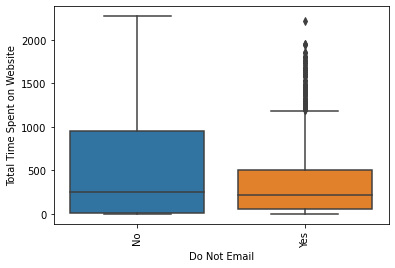

Boxplot Total Time Spent on Website Vs Do Not Call


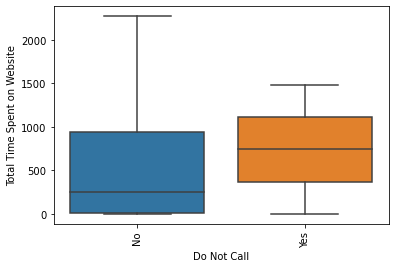

Boxplot Total Time Spent on Website Vs Last Activity


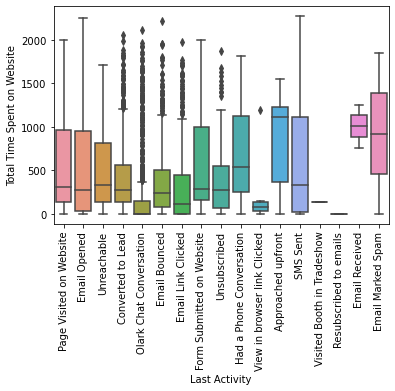

Boxplot Total Time Spent on Website Vs What is your current occupation


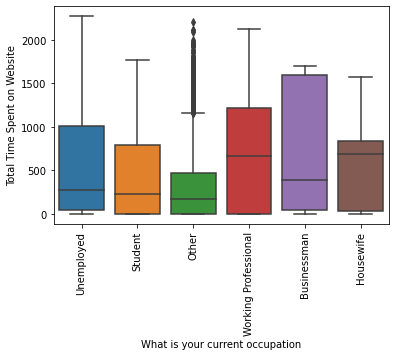

Boxplot Total Time Spent on Website Vs Search


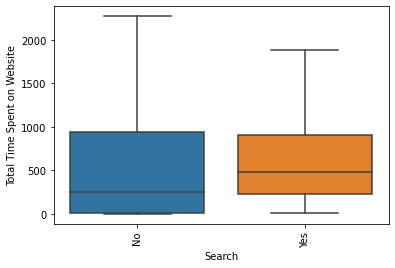

Boxplot Total Time Spent on Website Vs Magazine


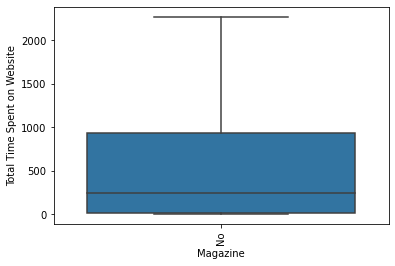

Boxplot Total Time Spent on Website Vs Newspaper Article


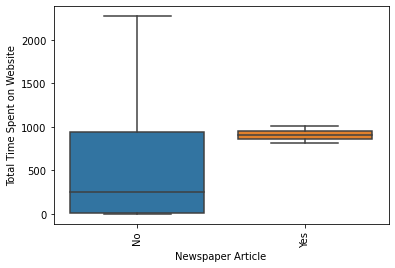

Boxplot Total Time Spent on Website Vs X Education Forums


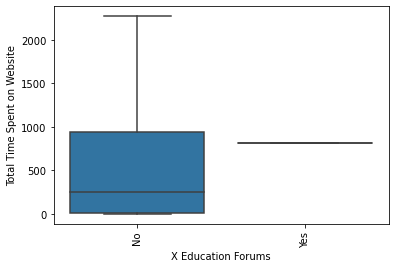

Boxplot Total Time Spent on Website Vs Newspaper


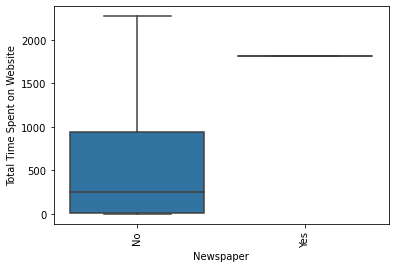

Boxplot Total Time Spent on Website Vs Digital Advertisement


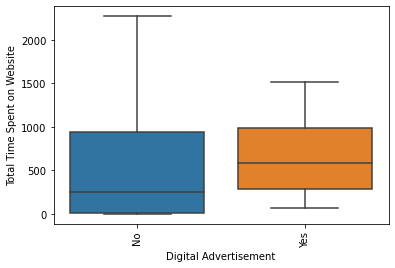

Boxplot Total Time Spent on Website Vs Through Recommendations


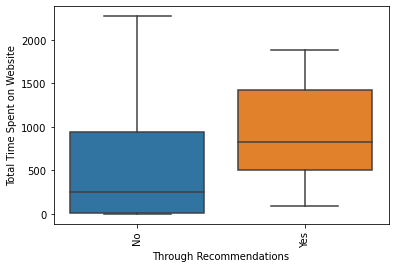

Boxplot Total Time Spent on Website Vs Receive More Updates About Our Courses


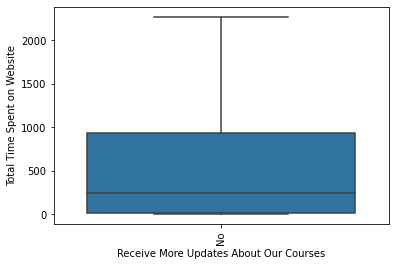

Boxplot Total Time Spent on Website Vs Update me on Supply Chain Content


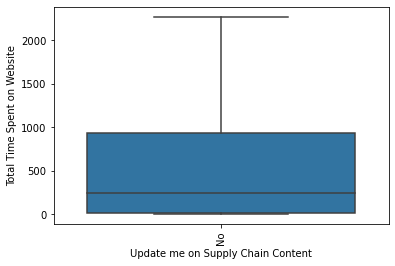

Boxplot Total Time Spent on Website Vs Get updates on DM Content


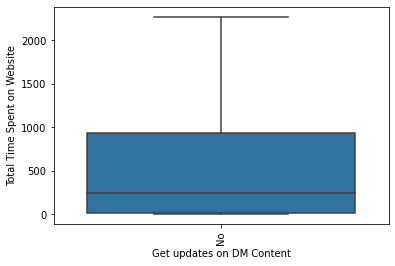

Boxplot Total Time Spent on Website Vs I agree to pay the amount through cheque


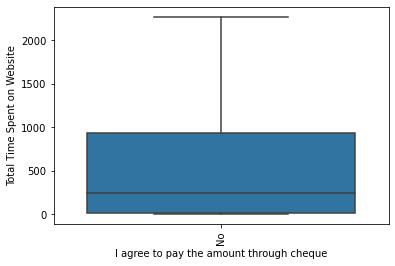

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


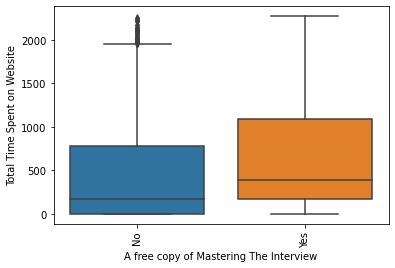

Boxplot Total Time Spent on Website Vs Last Notable Activity


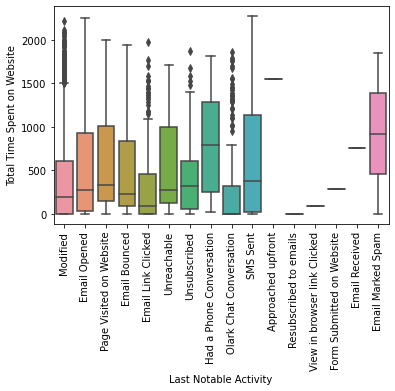

Boxplot Page Views Per Visit Vs Lead Origin


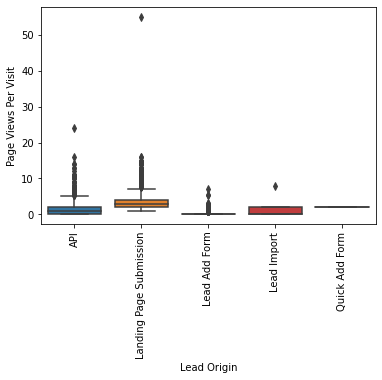

Boxplot Page Views Per Visit Vs Lead Source


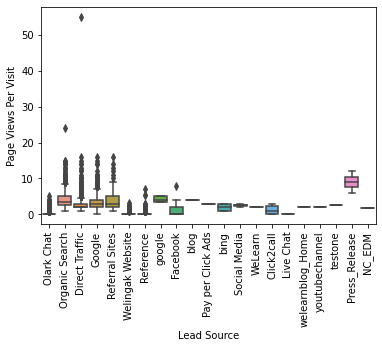

Boxplot Page Views Per Visit Vs Do Not Email


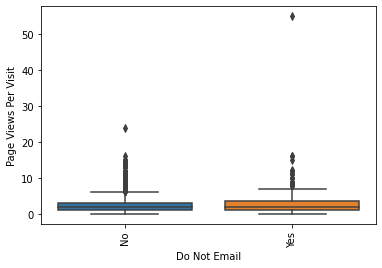

Boxplot Page Views Per Visit Vs Do Not Call


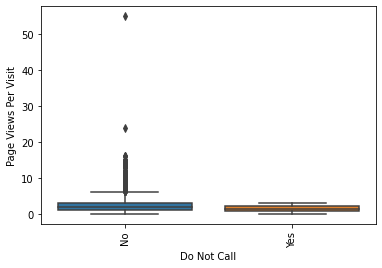

Boxplot Page Views Per Visit Vs Last Activity


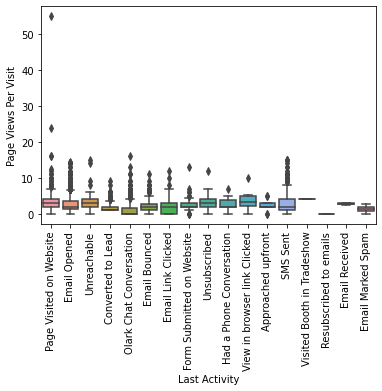

Boxplot Page Views Per Visit Vs What is your current occupation


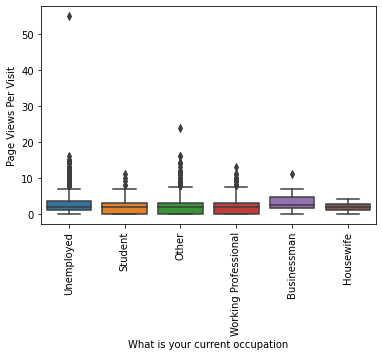

Boxplot Page Views Per Visit Vs Search


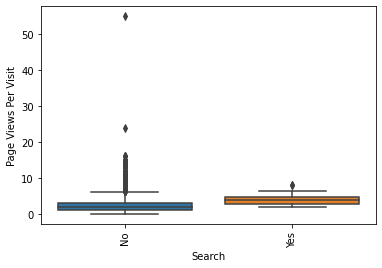

Boxplot Page Views Per Visit Vs Magazine


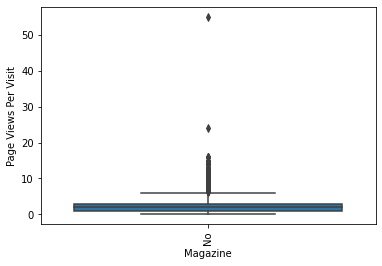

Boxplot Page Views Per Visit Vs Newspaper Article


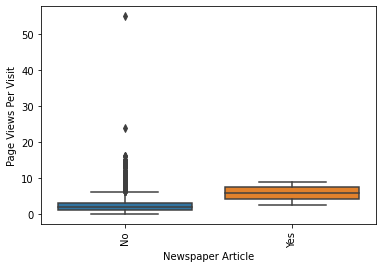

Boxplot Page Views Per Visit Vs X Education Forums


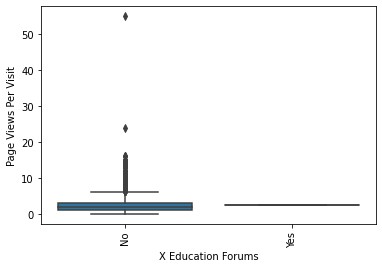

Boxplot Page Views Per Visit Vs Newspaper


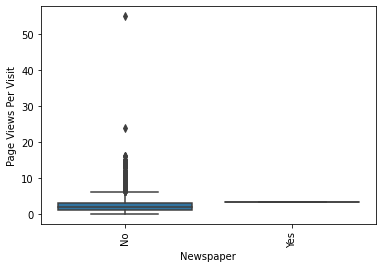

Boxplot Page Views Per Visit Vs Digital Advertisement


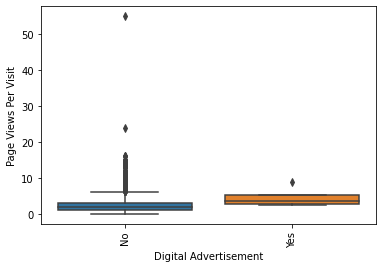

Boxplot Page Views Per Visit Vs Through Recommendations


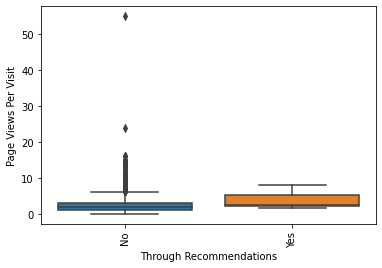

Boxplot Page Views Per Visit Vs Receive More Updates About Our Courses


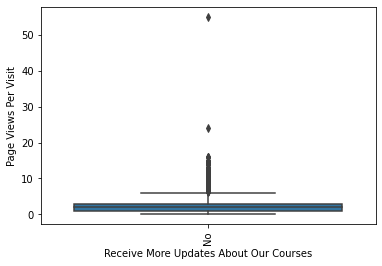

Boxplot Page Views Per Visit Vs Update me on Supply Chain Content


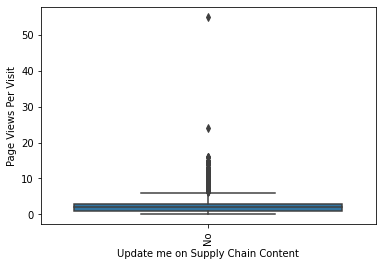

Boxplot Page Views Per Visit Vs Get updates on DM Content


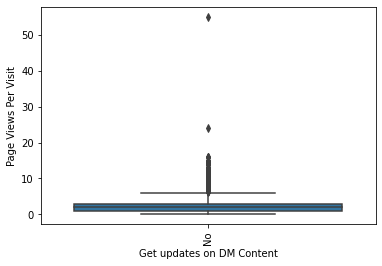

Boxplot Page Views Per Visit Vs I agree to pay the amount through cheque


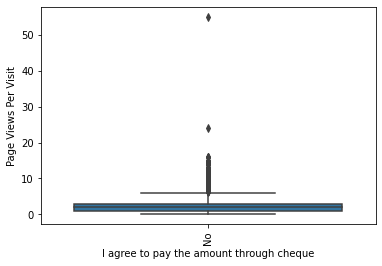

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


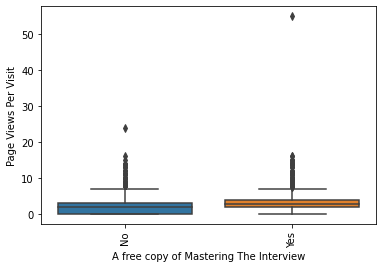

Boxplot Page Views Per Visit Vs Last Notable Activity


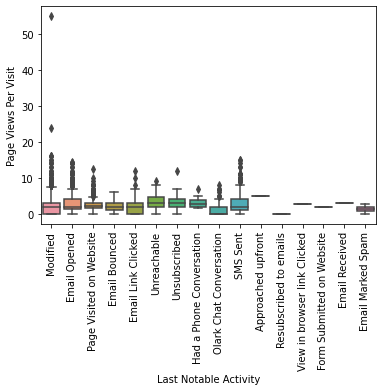

In [412]:
for i in df_num:
    for j in df_cat:
        print("Boxplot",i,"Vs",j)
        sns.boxplot(df_lead[j],df_lead[i]).tick_params(axis='x', rotation = 90)
        plt.show()

ScatterPlot Converted Vs TotalVisits


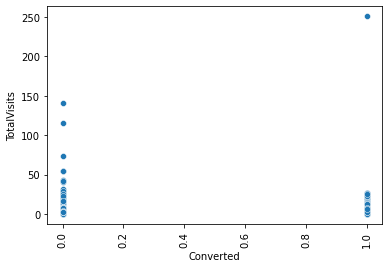

ScatterPlot Converted Vs Total Time Spent on Website


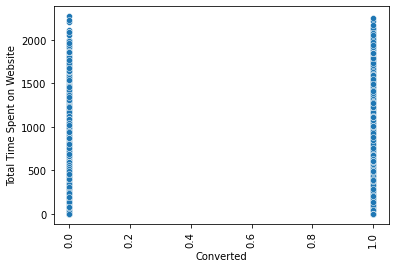

ScatterPlot Converted Vs Page Views Per Visit


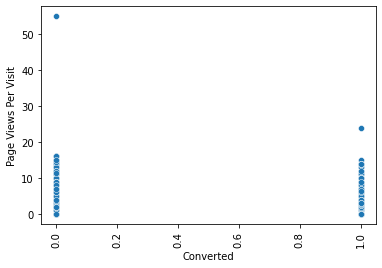

ScatterPlot TotalVisits Vs Converted


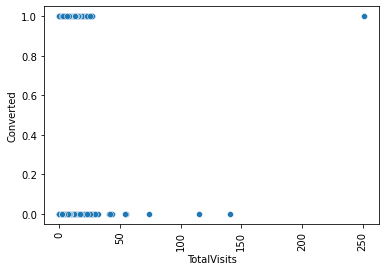

ScatterPlot TotalVisits Vs Total Time Spent on Website


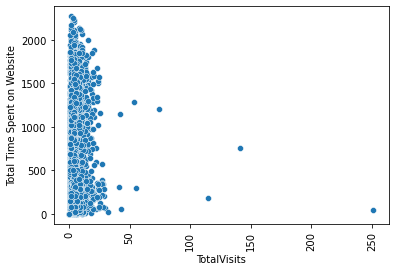

ScatterPlot TotalVisits Vs Page Views Per Visit


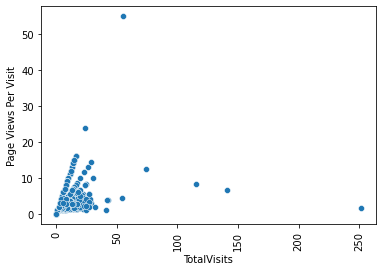

ScatterPlot Total Time Spent on Website Vs Converted


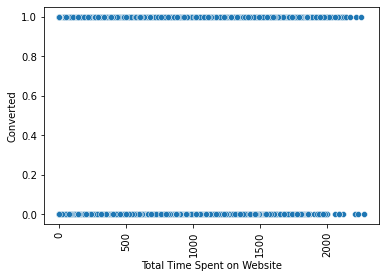

ScatterPlot Total Time Spent on Website Vs TotalVisits


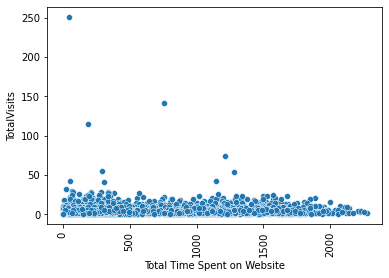

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


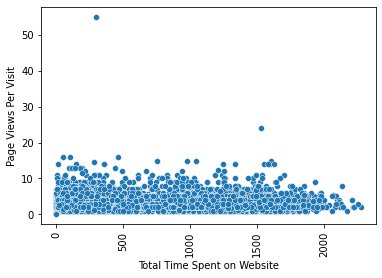

ScatterPlot Page Views Per Visit Vs Converted


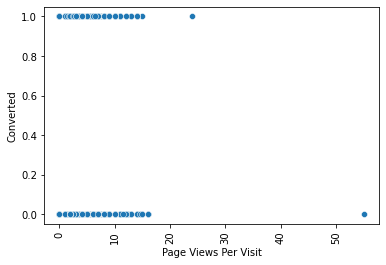

ScatterPlot Page Views Per Visit Vs TotalVisits


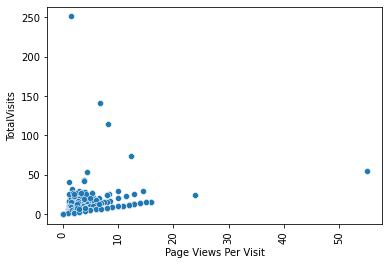

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


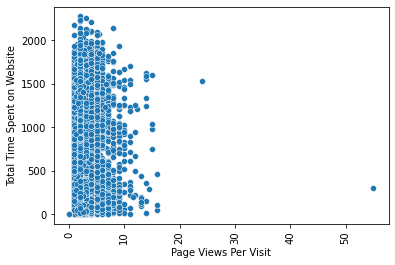

In [413]:
for i in df_num:
    for j in df_num:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(df_lead[i],df_lead[j]).tick_params(axis='x', rotation = 90)
            plt.show()

In [414]:
#Multivariate analysis

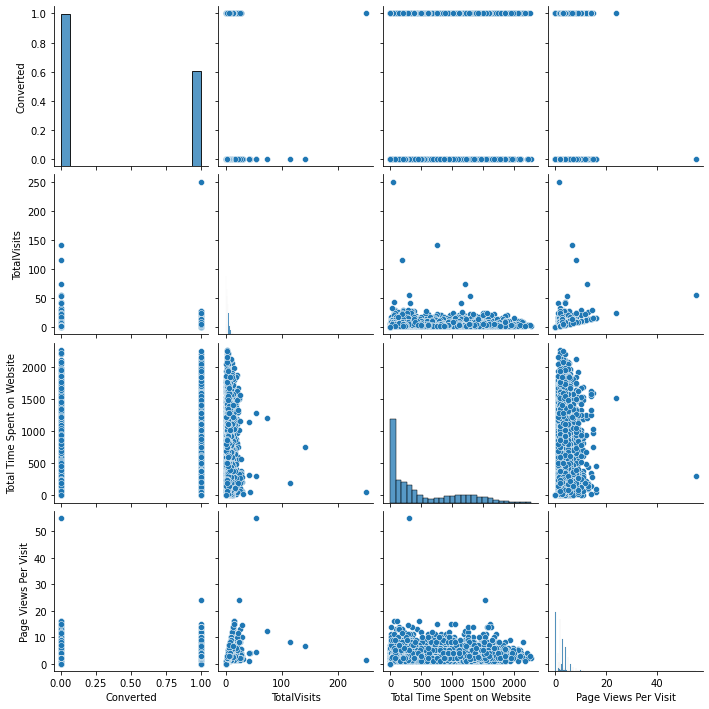

In [415]:
sns.pairplot(df_lead[df_num])

In [ ]:
#Checking the heat map

<AxesSubplot:>

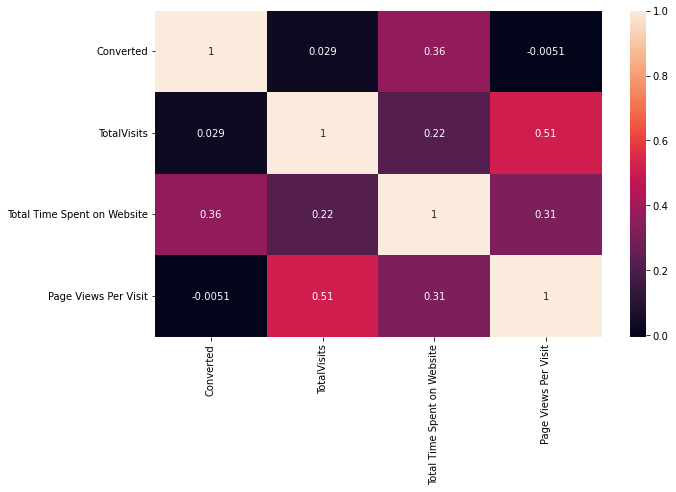

In [416]:
plt.figure(figsize=(10,6))
sns.heatmap(df_lead.corr(),annot=True)

In [417]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   What is your current occupation           9240 non-null   object 
 10  Search                              

In [418]:
#checkinh unique values for columns

In [419]:
df_lead.nunique()

Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the a

In [420]:
((df_lead['Lead Source'].value_counts(dropna=False))/df_lead['Lead Source'].value_counts(dropna=False).sum())*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [421]:
df_lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [ ]:
#clubbing all the small values and creating clubbed - Others

In [422]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['Referral Sites', 'Welingak Website', 'google',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], "Others")

In [423]:
((df_lead['Last Activity'].value_counts(dropna=False))/df_lead['Last Activity'].value_counts(dropna=False).sum())*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [ ]:
#clubbing all the small values and creating clubbed - Others

In [424]:
df_lead['Last Activity'] = df_lead['Last Activity'].replace(['Unreachable','Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',np.nan,
       'Approached upfront','Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], "Others")

In [425]:
df_lead.nunique()

Lead Origin                                    5
Lead Source                                    6
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                  6
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the a

In [426]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   What is your current occupation           9240 non-null   object 
 10  Search                              

In [427]:
#Dummies value creation for categorical columns

In [428]:
dum_cols=['What is your current occupation','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
dum=pd.get_dummies(df_lead[dum_cols],drop_first=True)
df_lead=df_lead.drop(dum_cols,axis=1)
df_lead=pd.concat([df_lead,dum],axis=1)

In [ ]:
#checcking the shape

In [429]:
df_lead.shape

(9240, 47)

In [430]:
df_lead.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Do Not Email_Yes', 'Do Not Call_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Search_Yes', 'Newspaper Article_Yes',
       'X Education Forums_Yes', 'Newspaper_Yes', 'Digital Advertisement_Yes',
       'Through Rec

In [431]:
#Spliting to train and test

In [432]:
X=df_lead.drop("Converted",axis=1)
y=df_lead[target]

In [433]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [434]:
#Checking the data size -rows after split

In [435]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 46)
Test X shape: (1848, 46)
Train y shape: (7392, 1)
Test y shape: (1848, 1)


In [436]:
#Outlier Treatment

In [437]:
df_num = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

In [438]:
for var in df_num:
    q1=X_train[var].describe()["25%"]
    q3=X_train[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    X_train[var]=np.where(X_train[var]>upper_bound,upper_bound,X_train[var])
    X_train[var]=np.where(X_train[var]<lower_bound,lower_bound,X_train[var])
    X_test[var]=np.where(X_test[var]>upper_bound,upper_bound,X_test[var])
    X_test[var]=np.where(X_test[var]<lower_bound,lower_bound,X_test[var])


In [439]:
X_train[df_num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7392.000000,7392.000000,7392.000000
mean,3.225514,483.190882,2.254843
std,2.862309,546.051337,1.776797
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,924.000000,3.000000
max,11.000000,2272.000000,6.000000


In [440]:
#Scaling all the numerical features

In [441]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#checking the shape of newly created data

In [442]:
X_test_scaled.shape

(1848, 46)

In [443]:
X_train_scaled.shape

(7392, 46)

In [ ]:
#converting to pandas dataframe

In [444]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
#checking the data

In [445]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.181818,0.060739,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.181818,0.034771,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.363636,0.694982,0.666667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#checking the data

In [446]:
X_test_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.727273,0.444982,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.454545,0.025968,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature seclection using RFE module

In [447]:
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train_scaled,y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [ ]:
#checking the features and its ranking

In [448]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 10),
 ('What is your current occupation_Unemployed', False, 9),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', False, 29),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 8),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited

In [ ]:
# storing the columns which RFE suggested

In [449]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [450]:
cols_to_keep

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Newspaper_Yes',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [ ]:
#mapping of RFE suggested columns to train n test data

In [451]:
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

In [ ]:
# using states model for model building hence adding constant

In [452]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [ ]:
#first model building and parameter checking

In [453]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.2
Date:                Tue, 15 Nov 2022   Deviance:                       5934.4
Time:                        14:47:31   Pearson chi2:                 7.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9842      0.107    -18.621      0.000      -2.193      -1.775
TotalVisits                                              1.1829      0.184      6.424      0.000       0.822       1.544
Total Time Spent on Website                              4.6372      0.158     29.349      0.000       4.328       4.947
Page Views Per Visit                                    -0.9393      0.185     -5.086      0.000      -1.301      -0.577
What is your current occupation_Housewife               22.8987   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Other                   -1.1196      0.082    -13.681      0.000      -1.280      -0.959
What is your current occupation_Working Professional     2.5564      0.177     14.480      0.000       2.210       2.902
Lead Origin_Lead Add Form                                3.8007      0.186     20.428      0.000       3.436       4.165
Lead Source_Olark Chat                                   1.2039      0.120     10.048      0.000       0.969       1.439
Do Not Email_Yes                                        -1.3360      0.157     -8.514      0.000      -1.644      -1.028
Last Activity_SMS Sent                                   1.3107      0.071     18.425      0.000       1.171       1.450
Newspaper_Yes                                          -24.8343   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Had a Phone Conversation           3.3879      1.123      3.016      0.003       1.186       5.589
Last Notable Activity_Modified                          -0.8559      0.075    -11.457      0.000      -1.002      -0.710
Last Notable Activity_Olark Chat Conversation           -1.1898      0.312     -3.818      0.000      -1.800      -0.579
Last Notable Activity_Unreachable                        1.7632      0.501      3.517      0.000       0.781       2.746
========================================================================================================================
"""

In [ ]:
#since p value is high hence droping the feature

In [454]:
X_train_sm= X_train_sm.drop(['Newspaper_Yes'], axis=1)
X_test_sm = X_test_sm.drop(['Newspaper_Yes'], axis=1)

In [ ]:
#Second model building and parameter check

In [455]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2969.6
Date:                Tue, 15 Nov 2022   Deviance:                       5939.1
Time:                        14:47:31   Pearson chi2:                 7.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4098
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9812      0.106    -18.605      0.000      -2.190      -1.773
TotalVisits                                              1.1688      0.184      6.352      0.000       0.808       1.529
Total Time Spent on Website                              4.6262      0.158     29.314      0.000       4.317       4.935
Page Views Per Visit                                    -0.9317      0.185     -5.047      0.000      -1.293      -0.570
What is your current occupation_Housewife               22.8985   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Other                   -1.1179      0.082    -13.667      0.000      -1.278      -0.958
What is your current occupation_Working Professional     2.5567      0.176     14.487      0.000       2.211       2.903
Lead Origin_Lead Add Form                                3.7975      0.186     20.416      0.000       3.433       4.162
Lead Source_Olark Chat                                   1.2003      0.120     10.024      0.000       0.966       1.435
Do Not Email_Yes                                        -1.3348      0.157     -8.510      0.000      -1.642      -1.027
Last Activity_SMS Sent                                   1.3113      0.071     18.443      0.000       1.172       1.451
Last Notable Activity_Had a Phone Conversation           3.3884      1.123      3.018      0.003       1.188       5.589
Last Notable Activity_Modified                          -0.8546      0.075    -11.444      0.000      -1.001      -0.708
Last Notable Activity_Olark Chat Conversation           -1.1864      0.311     -3.811      0.000      -1.797      -0.576
Last Notable Activity_Unreachable                        1.7636      0.501      3.519      0.000       0.781       2.746
========================================================================================================================
"""

In [ ]:
#since p value is high hence droping the feature

In [456]:
X_train_sm= X_train_sm.drop(['What is your current occupation_Housewife'], axis=1)
X_test_sm = X_test_sm.drop(['What is your current occupation_Housewife'], axis=1)

In [ ]:
#Third model building

In [457]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.7
Date:                Tue, 15 Nov 2022   Deviance:                       5953.5
Time:                        14:47:31   Pearson chi2:                 7.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4087
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9693      0.106    -18.535      0.000      -2.178      -1.761
TotalVisits                                              1.1575      0.184      6.296      0.000       0.797       1.518
Total Time Spent on Website                              4.6230      0.158     29.326      0.000       4.314       4.932
Page Views Per Visit                                    -0.9294      0.184     -5.039      0.000      -1.291      -0.568
What is your current occupation_Other                   -1.1226      0.082    -13.734      0.000      -1.283      -0.962
What is your current occupation_Working Professional     2.5495      0.176     14.453      0.000       2.204       2.895
Lead Origin_Lead Add Form                                3.8038      0.186     20.486      0.000       3.440       4.168
Lead Source_Olark Chat                                   1.1914      0.120      9.965      0.000       0.957       1.426
Do Not Email_Yes                                        -1.3397      0.157     -8.541      0.000      -1.647      -1.032
Last Activity_SMS Sent                                   1.3046      0.071     18.363      0.000       1.165       1.444
Last Notable Activity_Had a Phone Conversation           3.3823      1.123      3.013      0.003       1.182       5.583
Last Notable Activity_Modified                          -0.8512      0.075    -11.420      0.000      -0.997      -0.705
Last Notable Activity_Olark Chat Conversation           -1.1879      0.311     -3.816      0.000      -1.798      -0.578
Last Notable Activity_Unreachable                        1.7590      0.501      3.509      0.000       0.776       2.741
========================================================================================================================
"""

In [ ]:
#all p values are suggesting good hence checking VIF values

In [458]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
0,const,10.278275
3,Page Views Per Visit,2.940221
1,TotalVisits,2.403465
7,Lead Source_Olark Chat,1.953834
6,Lead Origin_Lead Add Form,1.425787
2,Total Time Spent on Website,1.272912
4,What is your current occupation_Other,1.145975
11,Last Notable Activity_Modified,1.139280
9,Last Activity_SMS Sent,1.115824
5,What is your current occupation_Working Profes...,1.084807


In [459]:
#Evaluetion of final model

In [460]:
y_pred=result3.predict(X_train_sm)
train=pd.DataFrame(y_pred,columns=["Predicted_prob"])
train["Actual"]=y_train["Converted"]
train["Predicted_Class"]=np.where(train["Predicted_prob"]>0.5,1,0)
train=train.dropna()

In [461]:
train.head()

,Predicted_prob,Actual,Predicted_Class
0,0.163962,0.0,0
1,0.381489,0.0,0
2,0.353593,1.0,0
3,0.912898,0.0,1
4,0.163962,1.0,0


In [462]:
confusion_matrix=metrics.confusion_matrix(train["Actual"],train["Predicted_Class"])


In [463]:
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Predicted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Predicted_Class"]))

Accuracy = 0.5392953929539296
Recall = 0.34339948231233824
Precision = 0.399197592778335


In [ ]:
# Making Predictions on the Test data

In [465]:
y_pred1=result3.predict(X_test_sm)
train1=pd.DataFrame(y_pred1,columns=["Predicted_prob"])
train1["Actual"]=y_test["Converted"]
train1["Predicted_Class"]=np.where(train1["Predicted_prob"]>0.5,1,0)
train1=train1.dropna()

In [466]:
confusion_matrix=metrics.confusion_matrix(train1["Actual"],train1["Predicted_Class"])

In [467]:
print("Accuracy =", metrics.accuracy_score(train1["Actual"], train1["Predicted_Class"]))
print("Recall =", metrics.recall_score(train1["Actual"], train1["Predicted_Class"]))
print("Precision =", metrics.precision_score(train1["Actual"], train1["Predicted_Class"]))

Accuracy = 0.5157894736842106
Recall = 0.34558823529411764
Precision = 0.33098591549295775
